<font color=Red>**Note**</font>: In order to make your answer stand out, please use colored text to write your answer. For example, the following code sets font color to blue. <font color=Blue>我是蓝色</font>

**You should put answer to every question in a different cell, so that the result can be displayed clearly. You can also add cells when necessary.** 

**Rename your Jupyter Notebook file as classNumber_Name, and send it to this email address(1614688593@qq.com) before due date.**

<font color=Red>**Due Date: 2021-05-20 23:59**</font>

# Lab 4. Analyze purchasing patterns using shopping mall customers dataset and clustering

In this tutorial we will try to analyze a shopping mall's customers using clustering. Since we do not know how many customer groups there are, clustering is a good tool for this kind of scenario.

# Table of Contents
1. [Basic process](#basic)
    1. [Load dataset](#data)
    2. [Explorative analysis with visualization](#vis)
2. [Cluster data](#clustering)
    1. [Preporcess the data](#preprocess)
    2. [Cluster data](#clusters)
    3. [Visualize the clusters](#vis_clusters)
    3. [Find a suitable number of clusters](#number)

## <a id='basic'>1. Basic process</a>
**Load the mall customers dataset (Mall_Customers.csv), perform sanity check and explorative analysis with visualization. In today's lab, we are going to use seaborn to generate pretty graphs.**

## <a id="data">1.1 Load dataset</a>
**【Q1】Load the dataset. How many instances and attributes does this dataset have?**

In [37]:
import pandas as pd

data=pd.read_csv('./Mall_Customers.csv')
data.shape

(200, 5)

**【Q2】What are the types of each attribute?**

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**【Q3】Does this dataset have missing values? Drop them if exists.**

In [3]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## <a id="vis">1.2 Explorative analysis with visualization</a>

In this section, we are goint to visualize the distribution of the attributes with seaborn. You can read seaborn's API here <a href='https://seaborn.pydata.org/api.html' target='blank'>https://seaborn.pydata.org/api.html</a>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

**For example, the following code visualize the distribution of the Annual Income column.**

D:\anaconda3\envs\tensorflow2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


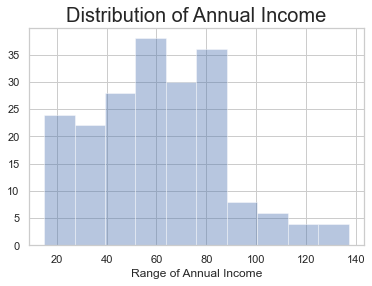

In [5]:
sns.set(style='whitegrid')
sns.distplot(data['Annual Income (k$)'], kde=False)
plt.title('Distribution of Annual Income', fontsize=20)
plt.xlabel('Range of Annual Income')
plt.show()

**【Q4】Visualize the Age column following the above example, i.e. using distplot. You can also try other kind of suitable plot types (leave your visualization to get extra points).**

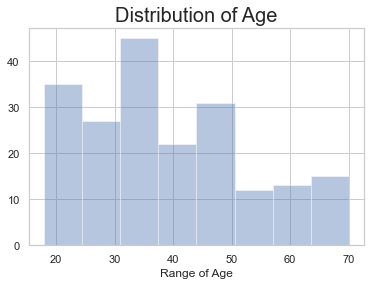

In [7]:
sns.distplot(data['Age'], kde=False)
plt.title('Distribution of Age', fontsize=20)
plt.xlabel('Range of Age')
plt.show()

**For example, the following code generates a count plot for the Spending Score column.**

D:\anaconda3\envs\tensorflow2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


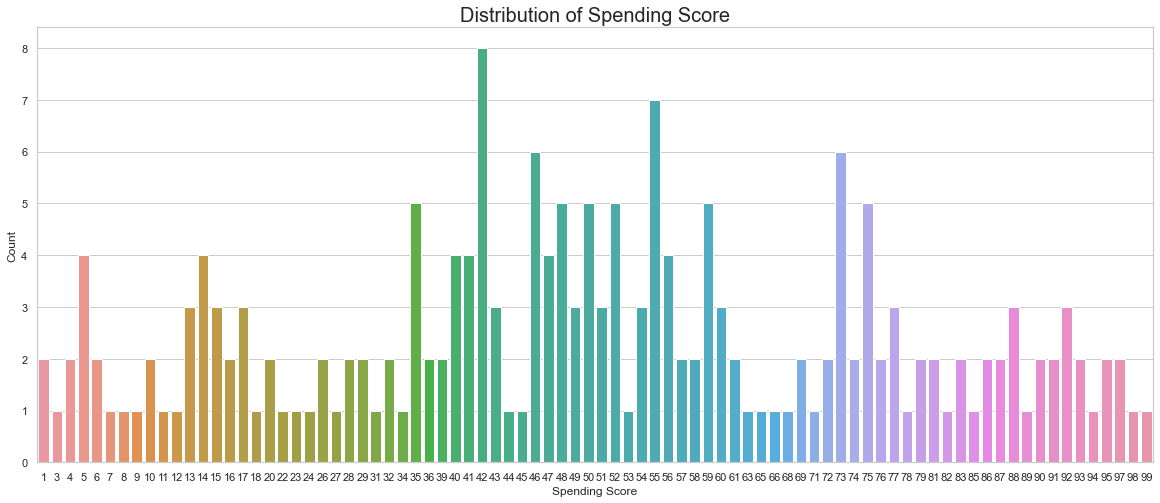

In [12]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score', fontsize=20)
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show()

**【Q5】Try using distplot on the Gender column. Does it work? Why? How to visualize this column?**

D:\anaconda3\envs\tensorflow2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


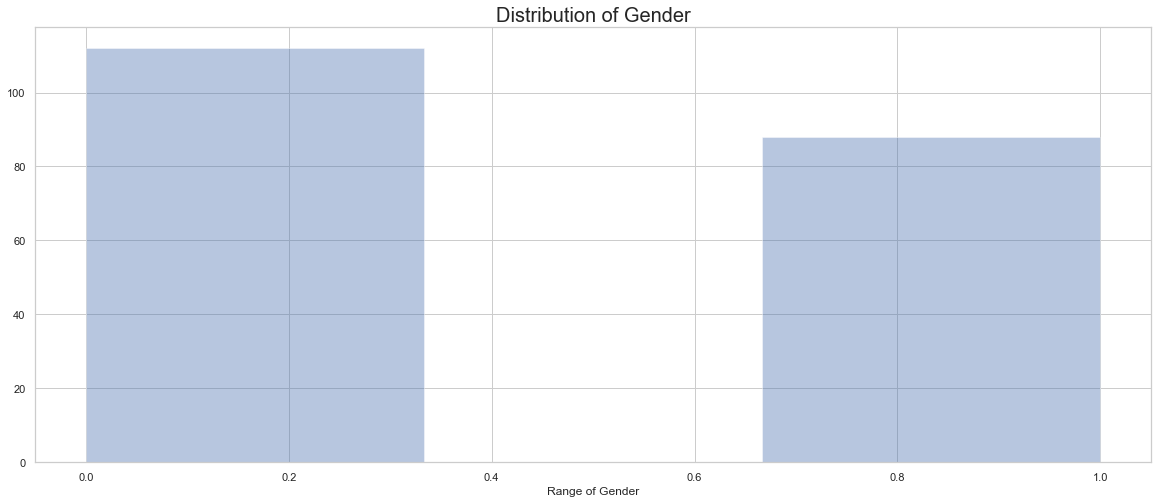

In [18]:
# it's didn't work, because Gender column is not continuous(numeric) data. we are gonna to convert the data to numeric data.
sns.distplot(data['Gender'].replace('Male', 1).replace('Female', 0), kde=False)
plt.title('Distribution of Gender', fontsize=20)
plt.xlabel('Range of Gender')
plt.show()

**For example, we can use bar plot instead, as shown below.**

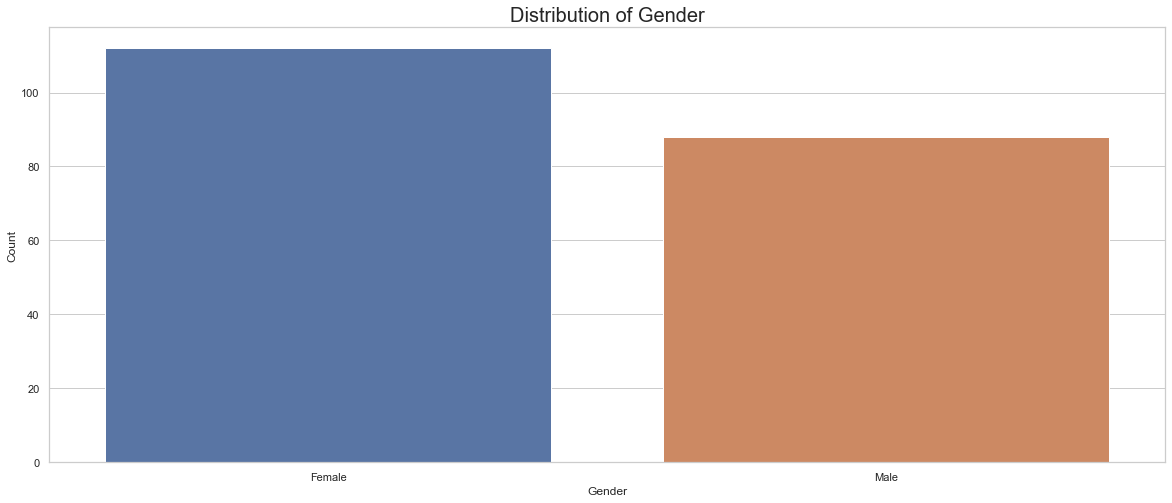

In [19]:
size = data['Gender'].value_counts()
labels = ['Female', 'Male']
sns.barplot(x=labels, y=size)
plt.title('Distribution of Gender', fontsize=20)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**We can also visualize the relations between different attributes using pairplot, as shown below.**

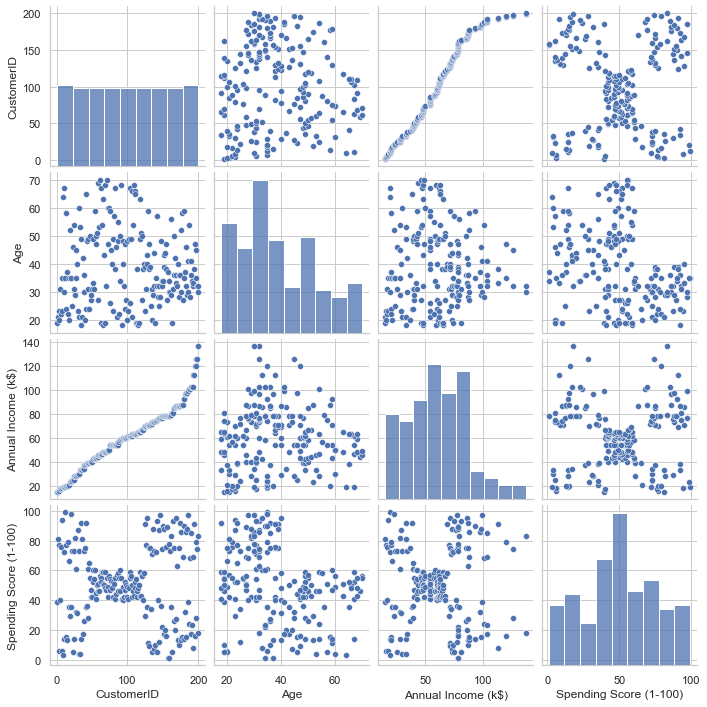

In [20]:
sns.pairplot(data)
plt.show()

**【Q6】What did you find from the above plot?**

1. most customer's annual income is between 40-90 $;
2. most customer's age is between 30-40 years old;
3. 35-75 point score is in the majority of all spending score;
4. female is prefer to go shopping than male;
5. the customer below 40 years old spending more score than those who above 40.

**Another way to visualize the relations between attributes is using heatmap, as the following example shows.**

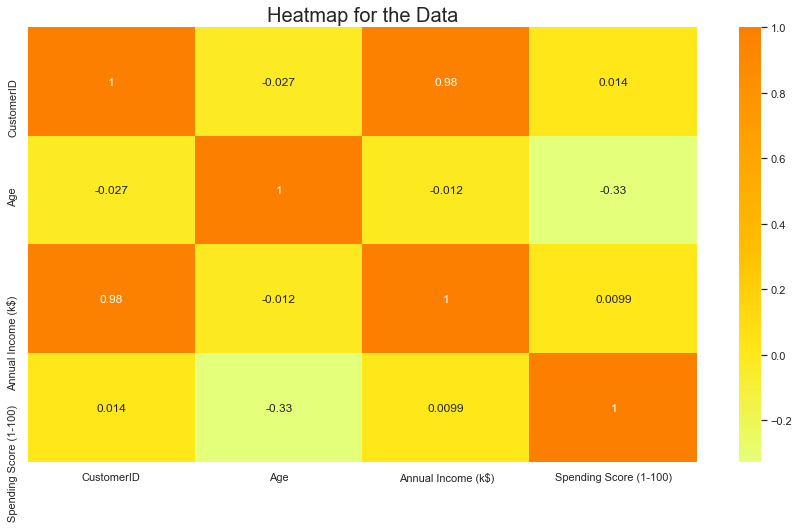

In [38]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

**The following example shows the bar plot for the gender column.**

D:\anaconda3\envs\tensorflow2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


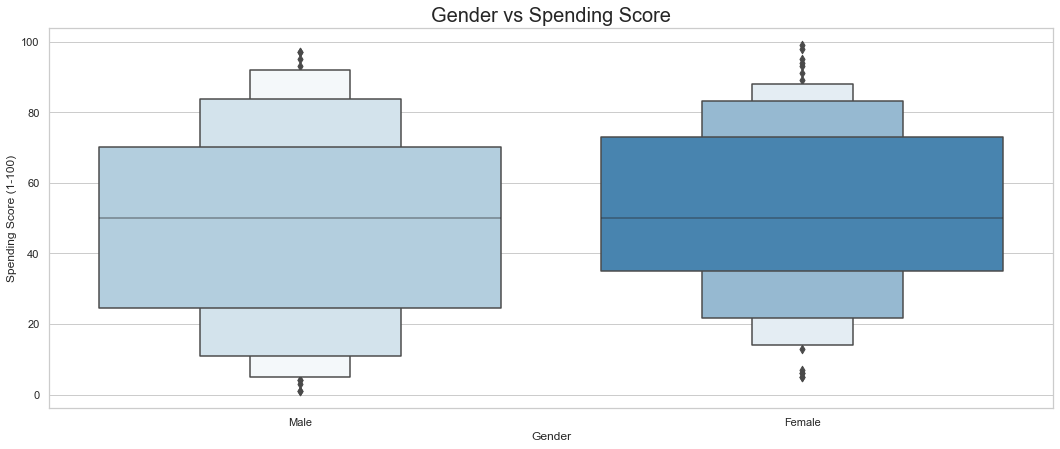

In [39]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['Gender'], data['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

**【Q7】What did you find from the above plot?**

1. **Annual Income (k$)** related with **CustomerID**;
2. female is prefer to go shopping than male and spend a little more score than male.

## <a id='clustering'>2. Cluster data</a>

In this section we will try to find customer groups using k-means clustering. You can read more about sklearn's implementation of k-means at <a href='https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html'>https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html</a>. 

## <a id="preprocess">2.1 Preprocess data</a>

**【Q8】Firstly, let's rename the columns to simpler names: 'ID', 'Gender', 'Age', 'Income', 'Spending'.**

In [40]:
data.rename(columns={'CustomerID': 'ID', 'Annual Income (k$)': 'Income','Spending Score (1-100)':'Spending'},inplace=True)
print(data.head(3))

   ID  Gender  Age  Income  Spending
0   1    Male   19      15        39
1   2    Male   21      15        81
2   3  Female   20      16         6


**【Q9】Secondly, the ID column is not helpful, let's delete it.**

In [41]:
data.drop('ID',axis=1,inplace=True)
print(data.head(3))

   Gender  Age  Income  Spending
0    Male   19      15        39
1    Male   21      15        81
2  Female   20      16         6


**【Q10】Thirdly, the Gender column is categorical, which cannot be used directly, let's convert it into numeric using LabelEncoder (see Lab 4).**

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Gender=le.fit_transform(data.Gender)
print(data.head(3))

   Gender  Age  Income  Spending
0       1   19      15        39
1       1   21      15        81
2       0   20      16         6


## <a id='clusters'>2.2 Cluster data</a>
**As an example, we start with clustering customers using their age and spending scores only:**

In [43]:
x = data.loc[:, ['Age','Spending']]
x.shape

(200, 2)

**We try with 5 clusters. The following code definds the clustering algorithm.**

In [44]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

**Cluster the data into 5 groups:**

In [45]:
y_means = km.fit_predict(x)

**Cluster assignments are stored in the y_means object. Print out the value of y_means, the _ith_ element value represents the cluster the _ith_ instance belongs to.**

## <a id='vis_clusters'>2.3 Visualize the clusters</a>
**The folloing code visualizes the five clusters, and the centers of each cluster, with different colors.**

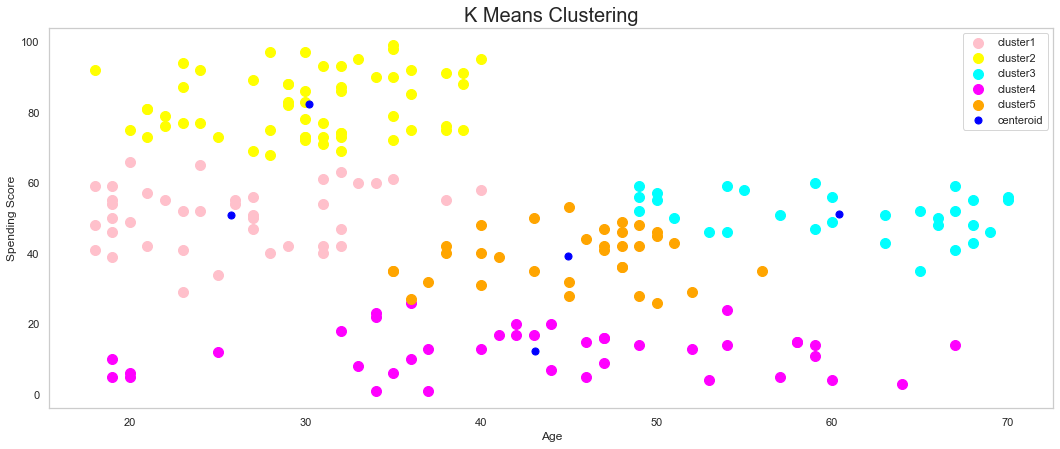

In [47]:
# cluster 1
plt.scatter(x.loc[y_means == 0, 'Age'], x.loc[y_means == 0, 'Spending'], s = 100, c = 'pink', label = 'cluster1')
# cluster 2
plt.scatter(x.loc[y_means == 1, 'Age'], x.loc[y_means == 1, 'Spending'], s = 100, c = 'yellow', label = 'cluster2')
# cluster 3
plt.scatter(x.loc[y_means == 2, 'Age'], x.loc[y_means == 2, 'Spending'], s = 100, c = 'cyan', label = 'cluster3')
# cluster 4
plt.scatter(x.loc[y_means == 3, 'Age'], x.loc[y_means == 3, 'Spending'], s = 100, c = 'magenta', label = 'cluster4')
# cluster 5
plt.scatter(x.loc[y_means == 4, 'Age'], x.loc[y_means == 4, 'Spending'], s = 100, c = 'orange', label = 'cluster5')
# cluster 6
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

**【Q11】What did you find from the above plot? Describe the characteristics of each cluster in Chinese.**

1. 35-55岁的消费者花的点数在25-40之间，消费能力处于中下的水平；
2. 消费能力比较高的人群年龄都在40岁以下。

**【Q12】Follow the above example, cluster customers into 5 groups using the Income and the Spending columns.**

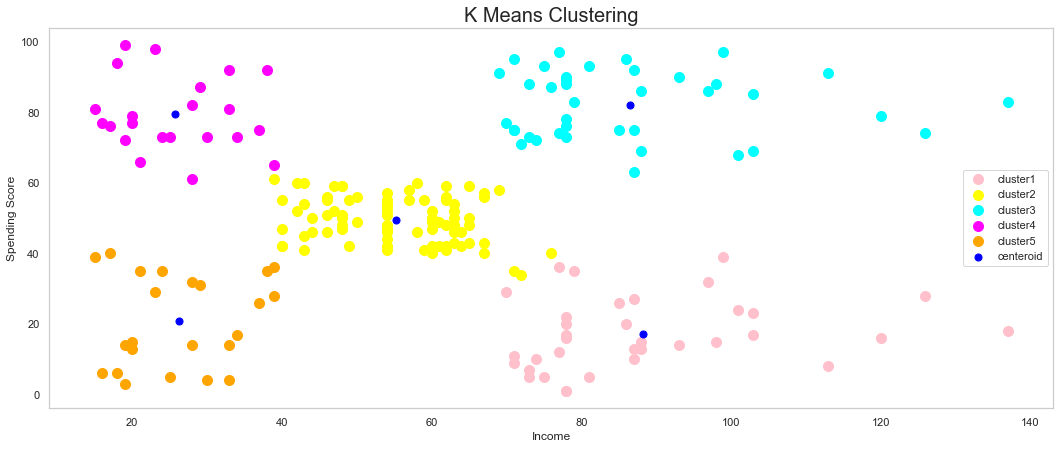

In [49]:
x2 = data.loc[:, ['Income','Spending']]
km2 = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means2 = km2.fit_predict(x2)
# cluster 1
plt.scatter(x2.loc[y_means2 == 0, 'Income'], x2.loc[y_means2 == 0, 'Spending'], s = 100, c = 'pink', label = 'cluster1')
# cluster 2
plt.scatter(x2.loc[y_means2 == 1, 'Income'], x2.loc[y_means2 == 1, 'Spending'], s = 100, c = 'yellow', label = 'cluster2')
# cluster 3
plt.scatter(x2.loc[y_means2 == 2, 'Income'], x2.loc[y_means2 == 2, 'Spending'], s = 100, c = 'cyan', label = 'cluster3')
# cluster 4
plt.scatter(x2.loc[y_means2 == 3, 'Income'], x2.loc[y_means2 == 3, 'Spending'], s = 100, c = 'magenta', label = 'cluster4')
# cluster 5
plt.scatter(x2.loc[y_means2 == 4, 'Income'], x2.loc[y_means2 == 4, 'Spending'], s = 100, c = 'orange', label = 'cluster5')
# cluster 6
plt.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

**【Q13】(Optional) You can also try different number of clusters, or using different columns. Leave your results below to get extra points.** 

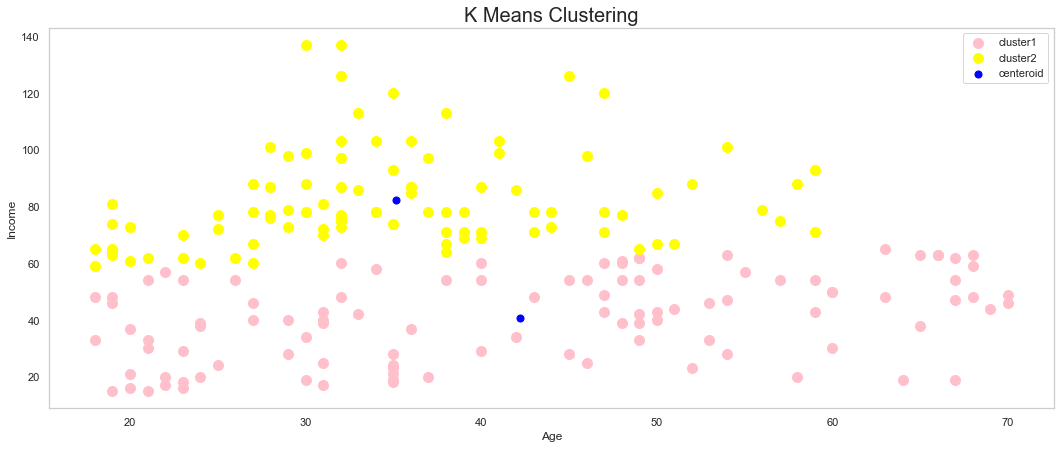

In [52]:
x3 = data.loc[:, ['Age','Income']]
km3 = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means3 = km3.fit_predict(x3)
# cluster 1
plt.scatter(x3.loc[y_means3 == 0, 'Age'], x3.loc[y_means3 == 0, 'Income'], s = 100, c = 'pink', label = 'cluster1')
# cluster 2
plt.scatter(x3.loc[y_means3 == 1, 'Age'], x3.loc[y_means3 == 1, 'Income'], s = 100, c = 'yellow', label = 'cluster2')
plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.grid()
plt.show()

## <a id='number'>2.4 Find a suitable number of clusters</a>
    
**How to determine an appropriate number of clusters? We can use the Elbow method: basically, to determine the optimal number of clusters, we have to select the value of k at the “elbow”, i.e. the point after which the metric (in the following case is inertia) scores start decreasing in a linear fashion.**

**General steps for using the "elbow" method:**

1. select a metric
1. generate clusters using different number of clusters and compute the metric score
2. plot the scores
3. select the "elbow" as the optimal number of clusters

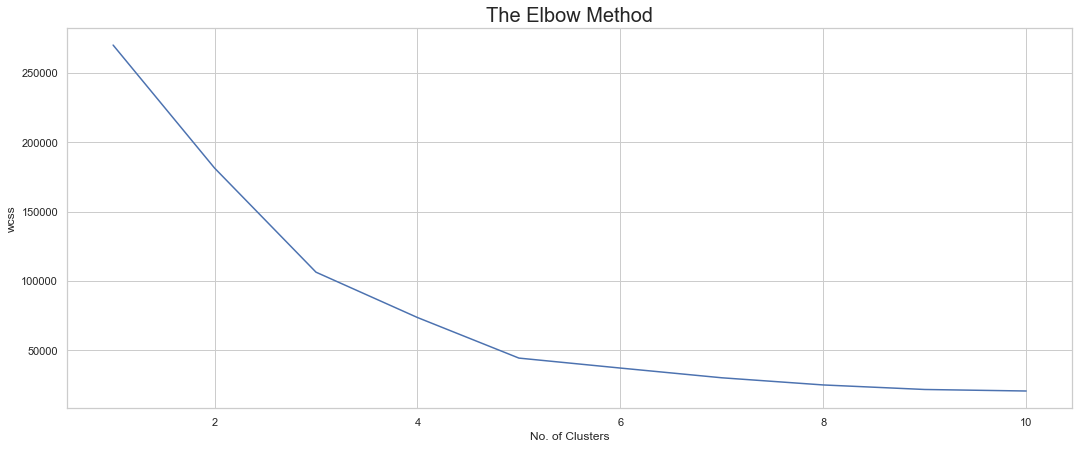

In [53]:
x = data.loc[:, ['Income', 'Spending']]

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**【Q14】(Optional) You can also try finding the optimal number of clusters when using different columns to generate customer clusters. Leave your results below to get extra points.** 

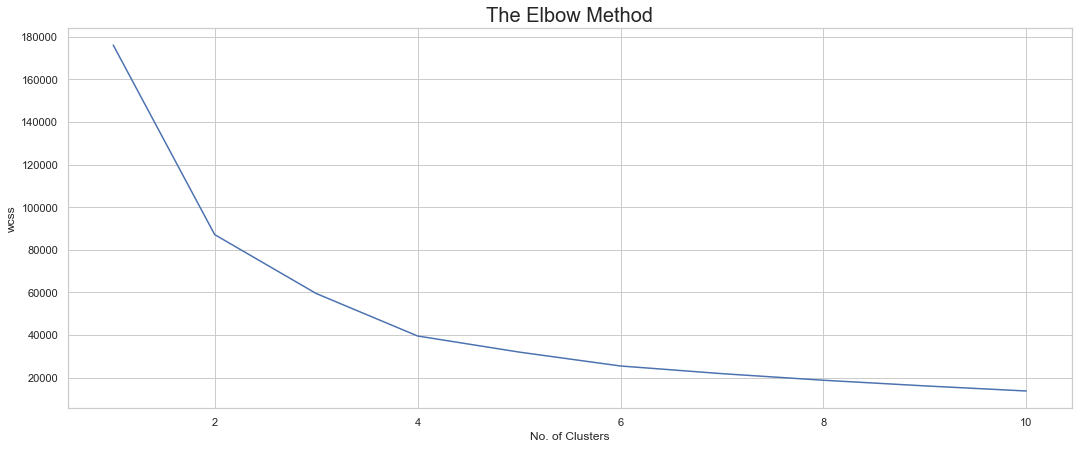

In [54]:
x = data.loc[:, ['Age','Income']]

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()